# Agent-Based Lighting Model Initial Tests

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set_theme()
pallet = sns.color_palette()

from numpy.random import default_rng

rng = default_rng()

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 300


generate_new = False
constant_lighting_load_file = "data/lighting_small_constant_df_" + "210509_1939" + ".pkl"
variable_lighting_load_file = "data/lighting_small_variable_df_" + "210509_1939" + ".pkl"

from model import NaSchTraffic

In [13]:
# Shared parameters
test_width = 100
test_density = 0.01
test_max_speed = 5
test_p_rand = 0.5
test_record_traffic_data = False
test_record_pos = True
test_light_level = 80
test_k_params = [0.3,    # k0: Offset
                0.2,    # k1: Lit state
                0.6,    # k2: Sensor state
                0.5,    # k3: Light N-1
                0.2,    # k4: Light N-2
                0.1,    # k5: Light N+1
                0.0]    # k6: Light N+2
test_lighting_feedback = False
test_desired_lighting_level = 30
test_record_lights = True
test_seed = 1234

test_length = 200

In [14]:
if generate_new:
    constant_model = NaSchTraffic(width=test_width,
                                 vehicle_density=test_density,
                                 general_max_speed=test_max_speed,
                                 p_randomisation=test_p_rand,
                                 record_traffic_data=test_record_traffic_data,
                                 record_positions=test_record_pos,
                                 max_light_level=test_light_level,
                                 lighting_model_type=1,
                                 k_parameters=test_k_params,
                                 lighting_feedback=test_lighting_feedback,
                                 desired_lighting_level=test_desired_lighting_level,
                                 record_lights=test_record_lights,
                                 debug=False,
                                 seed=test_seed)

    while constant_model.running and constant_model.schedule.steps < test_length:
        constant_model.step()
    print(constant_model.schedule.steps) # Show how many steps have actually run

    constant_model_out = constant_model.datacollector.get_model_vars_dataframe()
    # SAVE TO FILE
    time_str = time.strftime("%y%m%d_%H%M")
    constant_model_out.to_pickle("data/lighting_small_constant_df_" + time_str + ".pkl")
else:
    # LOAD FROM FILE
    constant_model_out = pd.read_pickle(constant_lighting_load_file)

constant_model_out.head()


,Agent_Positions,Average_Perceived_Lighting,Lighting_Level,Average_Power,Max_Standard_Deviation_Lighting,Lighting_Values
0,[],0.000000,0.0,0.000000,0.000000,[]
1,"[(60, 0, 0)]",20.000000,52.6,63.523999,0.000000,"[80, 56.8, 41.6, 32.0, 32.0, 41.6, 56.8, 80, 8..."
2,"[(61, 1, 1)]",53.733333,52.6,63.523999,20.335410,"[80, 56.8, 41.6, 32.0, 32.0, 41.6, 56.8, 80, 8..."
3,"[(63, 2, 2)]",43.466667,52.6,63.523999,10.210235,"[80, 56.8, 41.6, 32.0, 32.0, 41.6, 56.8, 80, 8..."
4,"[(65, 3, 2)]",50.311111,52.6,63.523999,18.271802,"[80, 56.8, 41.6, 32.0, 32.0, 41.6, 56.8, 80, 8..."


In [15]:
if generate_new:
    variable_model = NaSchTraffic(
                                 width=test_width,
                                 vehicle_density=test_density,
                                 general_max_speed=test_max_speed,
                                 p_randomisation=test_p_rand,
                                 record_traffic_data=test_record_traffic_data,
                                 record_positions=test_record_pos,
                                 max_light_level=test_light_level,
                                 lighting_model_type=2,
                                 k_parameters=test_k_params,
                                 lighting_feedback=test_lighting_feedback,
                                 desired_lighting_level=test_desired_lighting_level,
                                 record_lights=test_record_lights,
                                 debug=False,
                                 seed=test_seed)

    while variable_model.running and variable_model.schedule.steps < test_length:
        variable_model.step()
    print(variable_model.schedule.steps) # Show how many steps have actually run

    variable_model_out = variable_model.datacollector.get_model_vars_dataframe()
    # SAVE TO FILE
    time_str = time.strftime("%y%m%d_%H%M")
    variable_model_out.to_pickle("data/lighting_small_variable_df_" + time_str + ".pkl")
else:
    # LOAD FROM FILE
    variable_model_out = pd.read_pickle(variable_lighting_load_file)

variable_model_out.head()

,Agent_Positions,Average_Perceived_Lighting,Lighting_Level,Average_Power,Max_Standard_Deviation_Lighting,Lighting_Values
0,[],0.000000,0.000000,0.000000,0.000000,[]
1,"[(60, 0, 0)]",20.000000,24.108333,24.784415,0.000000,"[30.0, 21.299999999999997, 15.600000000000001,..."
2,"[(61, 1, 1)]",50.400000,34.014667,37.310874,24.778485,"[36.0, 25.56, 18.72, 14.4, 14.4, 18.72, 25.56,..."
3,"[(63, 2, 2)]",43.466667,35.119267,38.806905,10.210235,"[37.2, 26.412, 19.344, 14.880000000000003, 14...."
4,"[(65, 3, 2)]",50.311111,32.913573,35.077761,18.271802,"[37.44, 26.582399999999996, 19.468799999999998..."


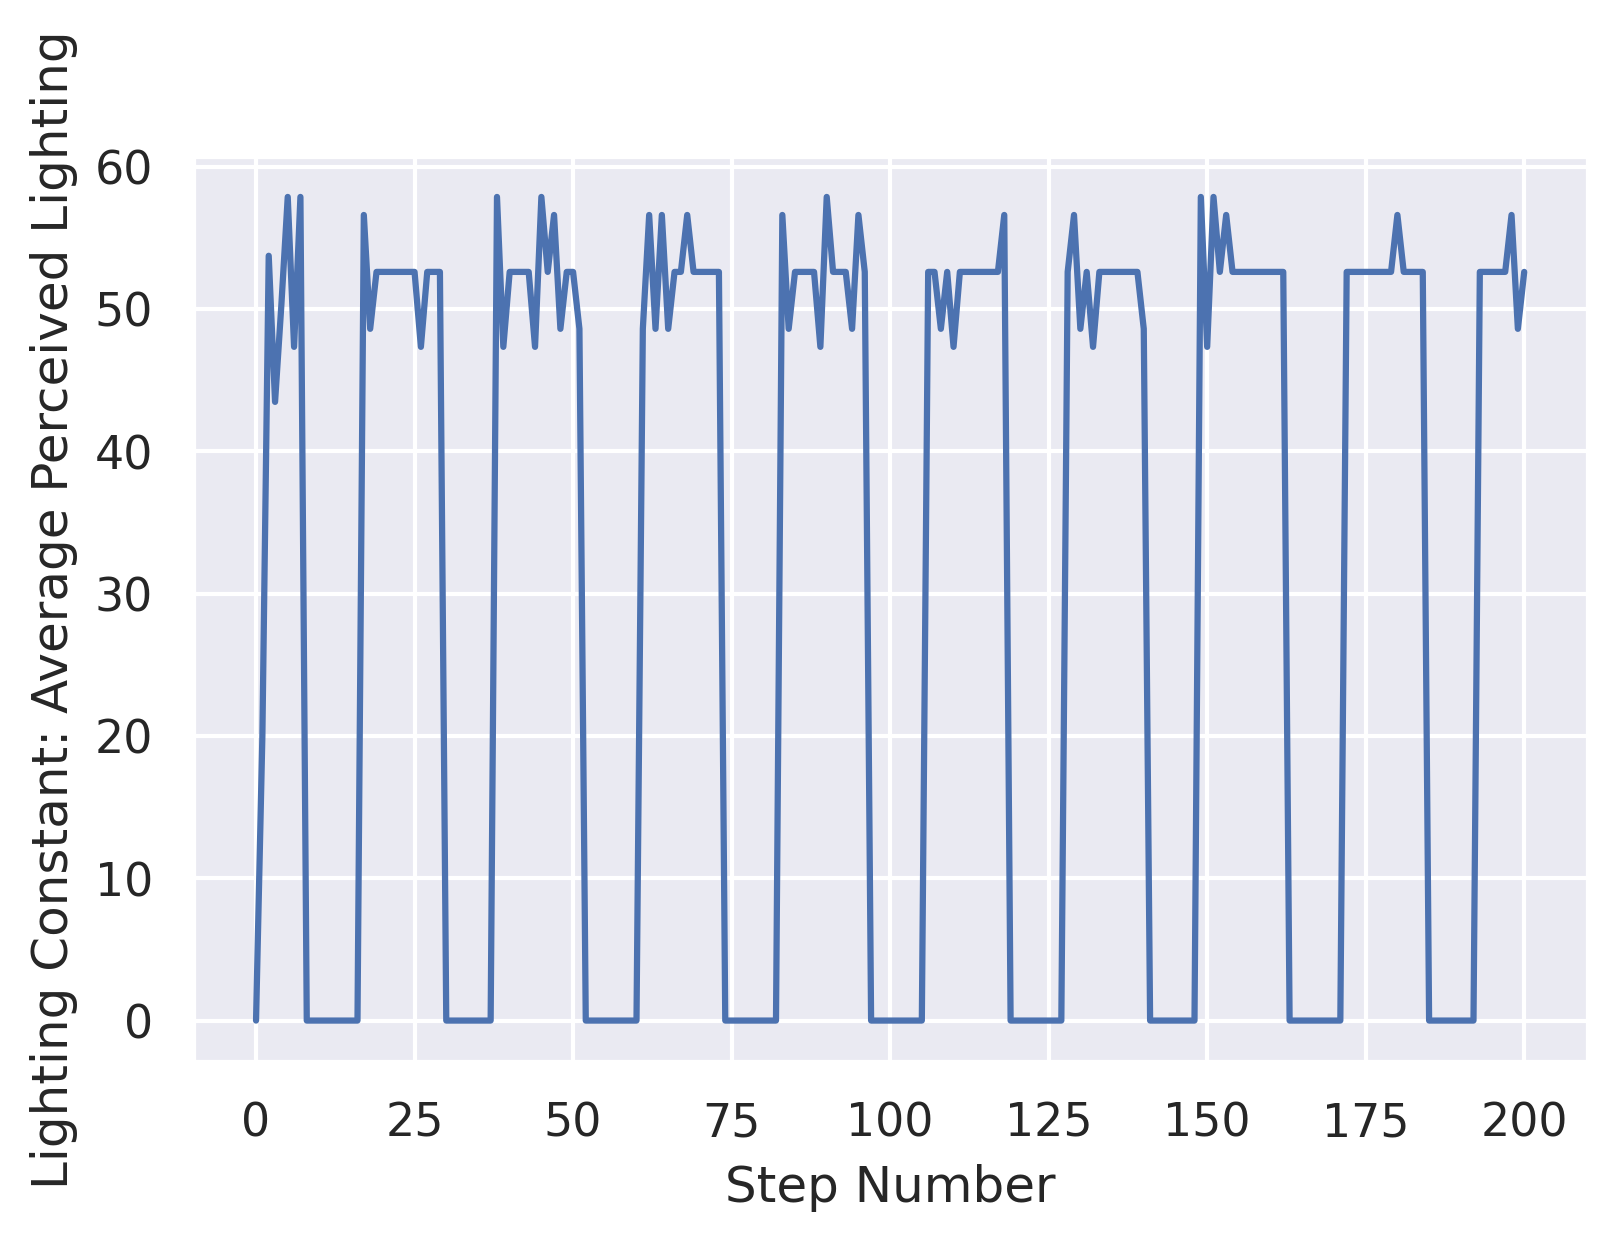

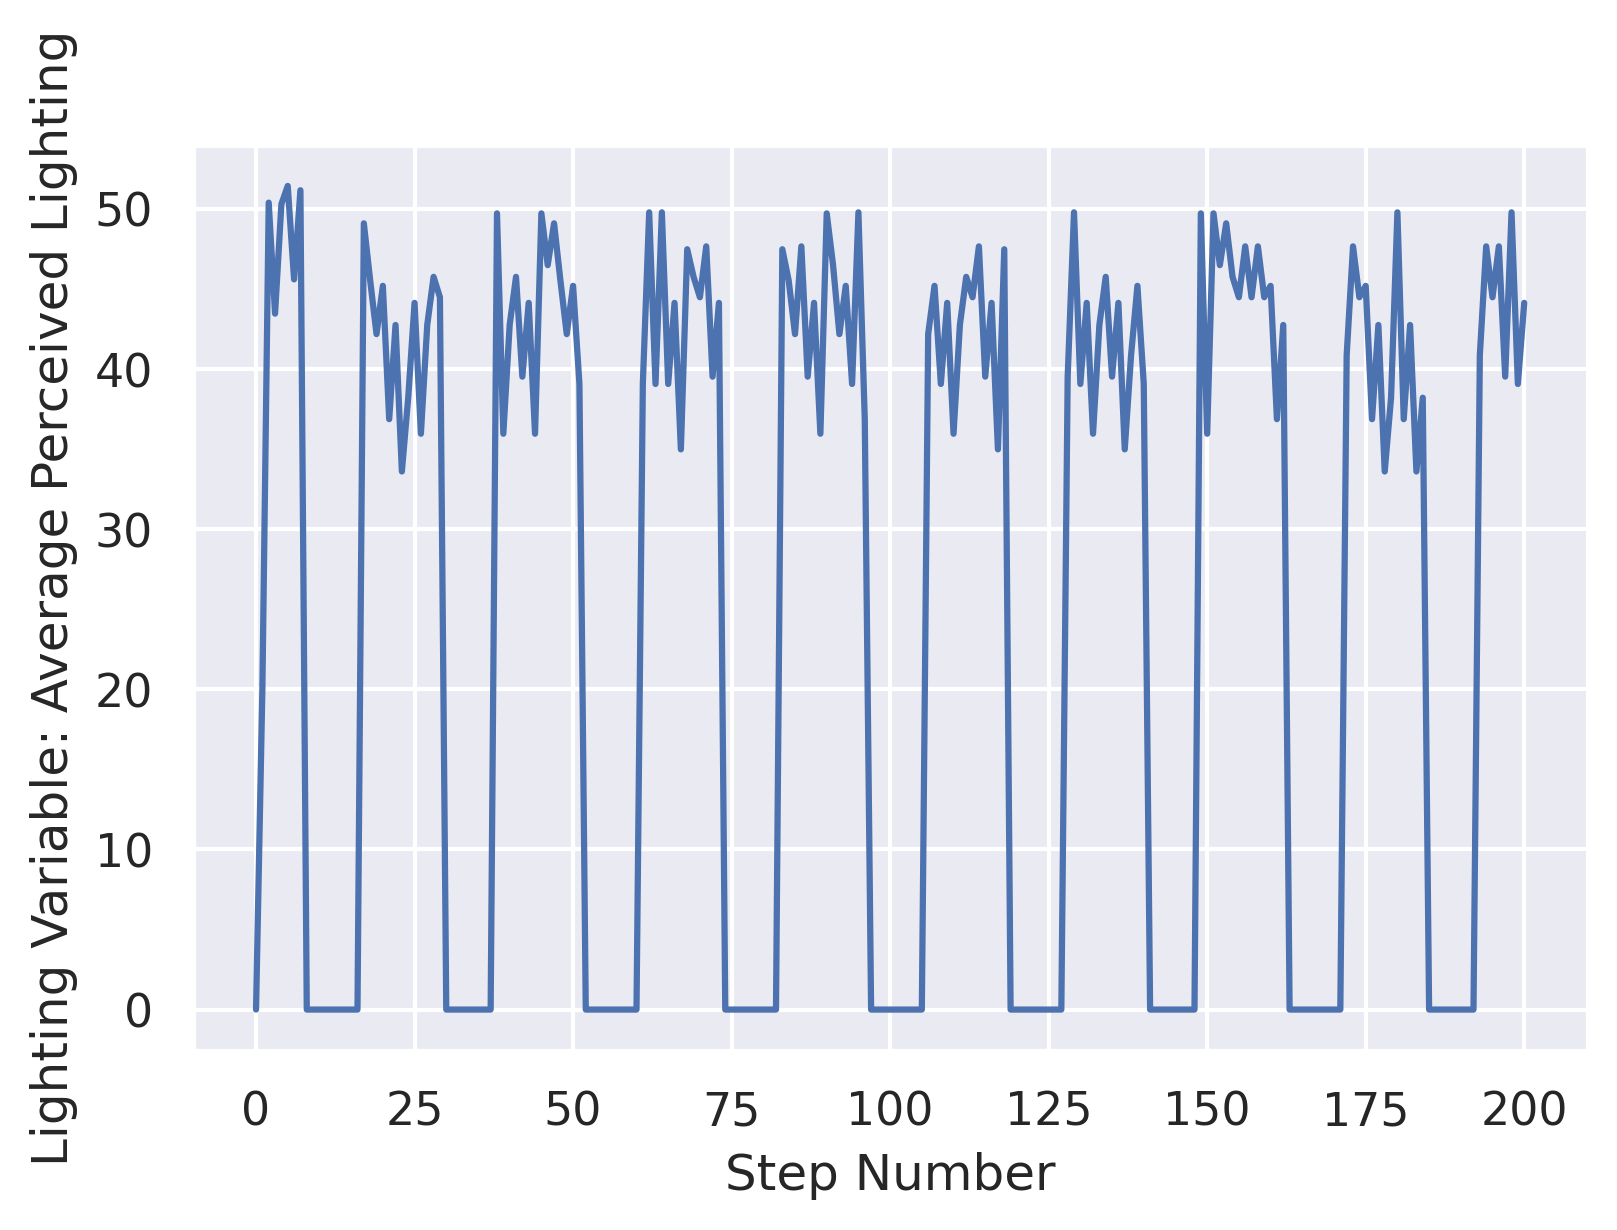

In [16]:
plt.plot(constant_model_out.Average_Perceived_Lighting)
plt.xlabel('Step Number')
plt.ylabel('Lighting Constant: Average Perceived Lighting')
plt.show()


plt.plot(variable_model_out.Average_Perceived_Lighting)
plt.xlabel('Step Number')
plt.ylabel('Lighting Variable: Average Perceived Lighting')
plt.show()

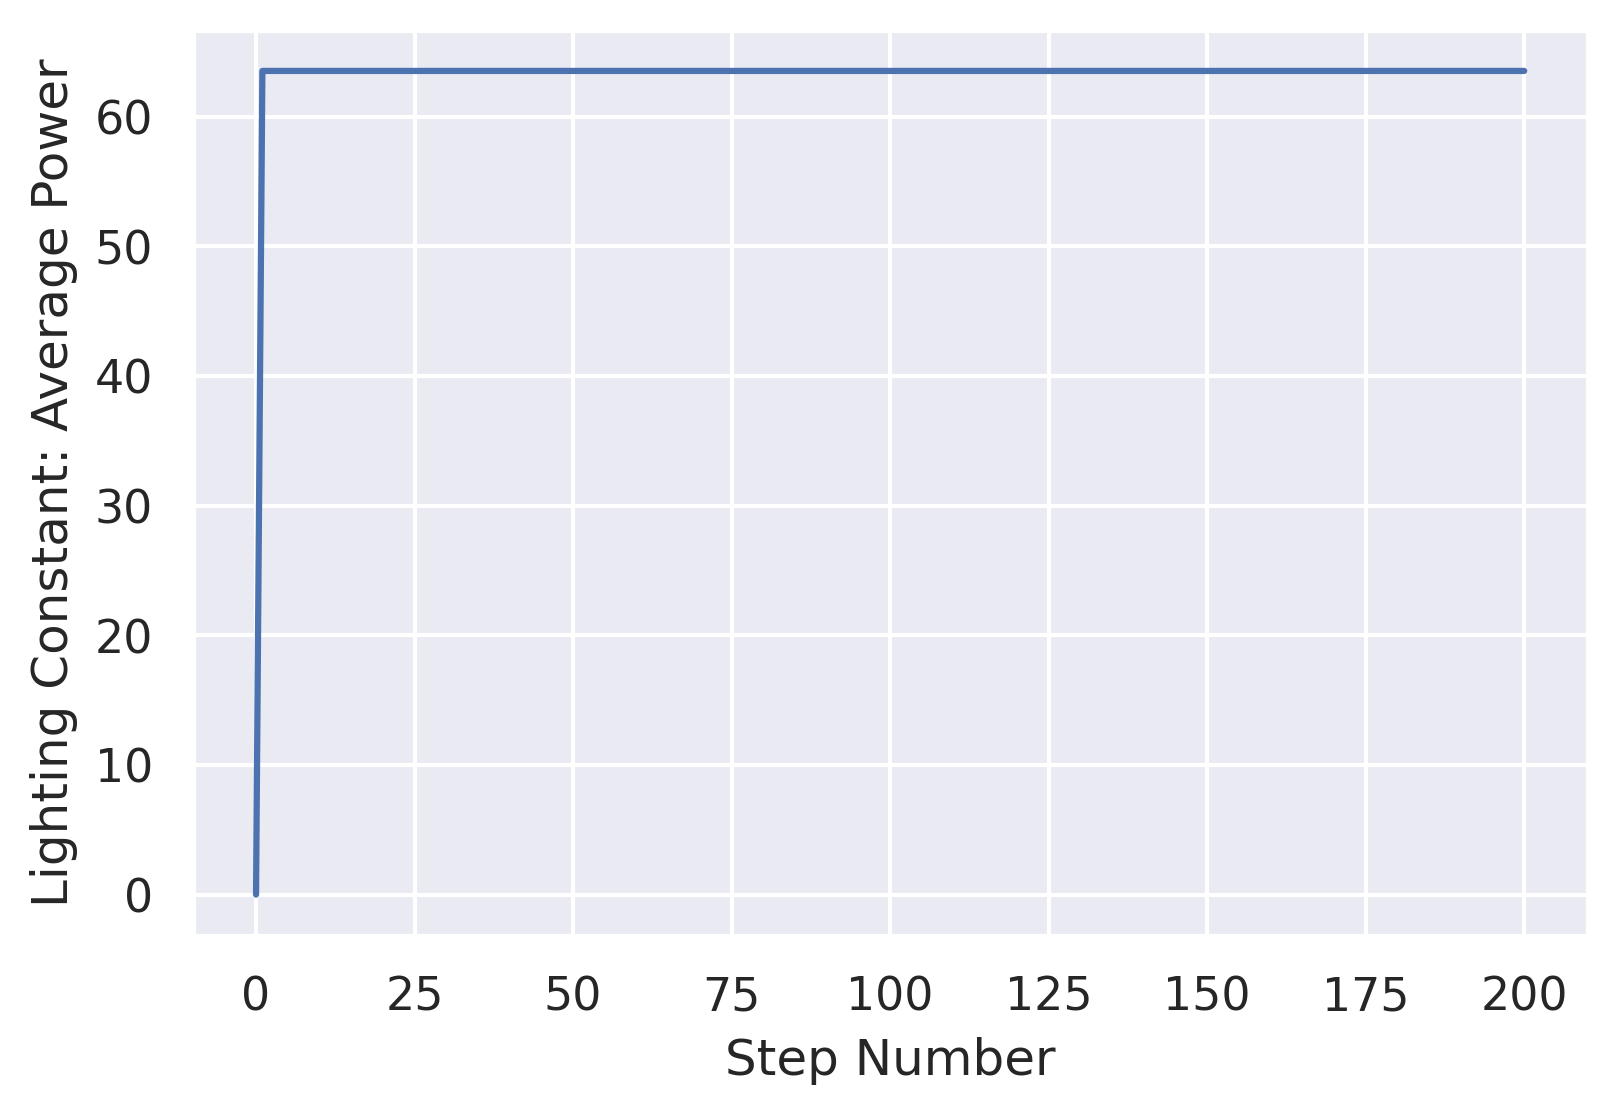

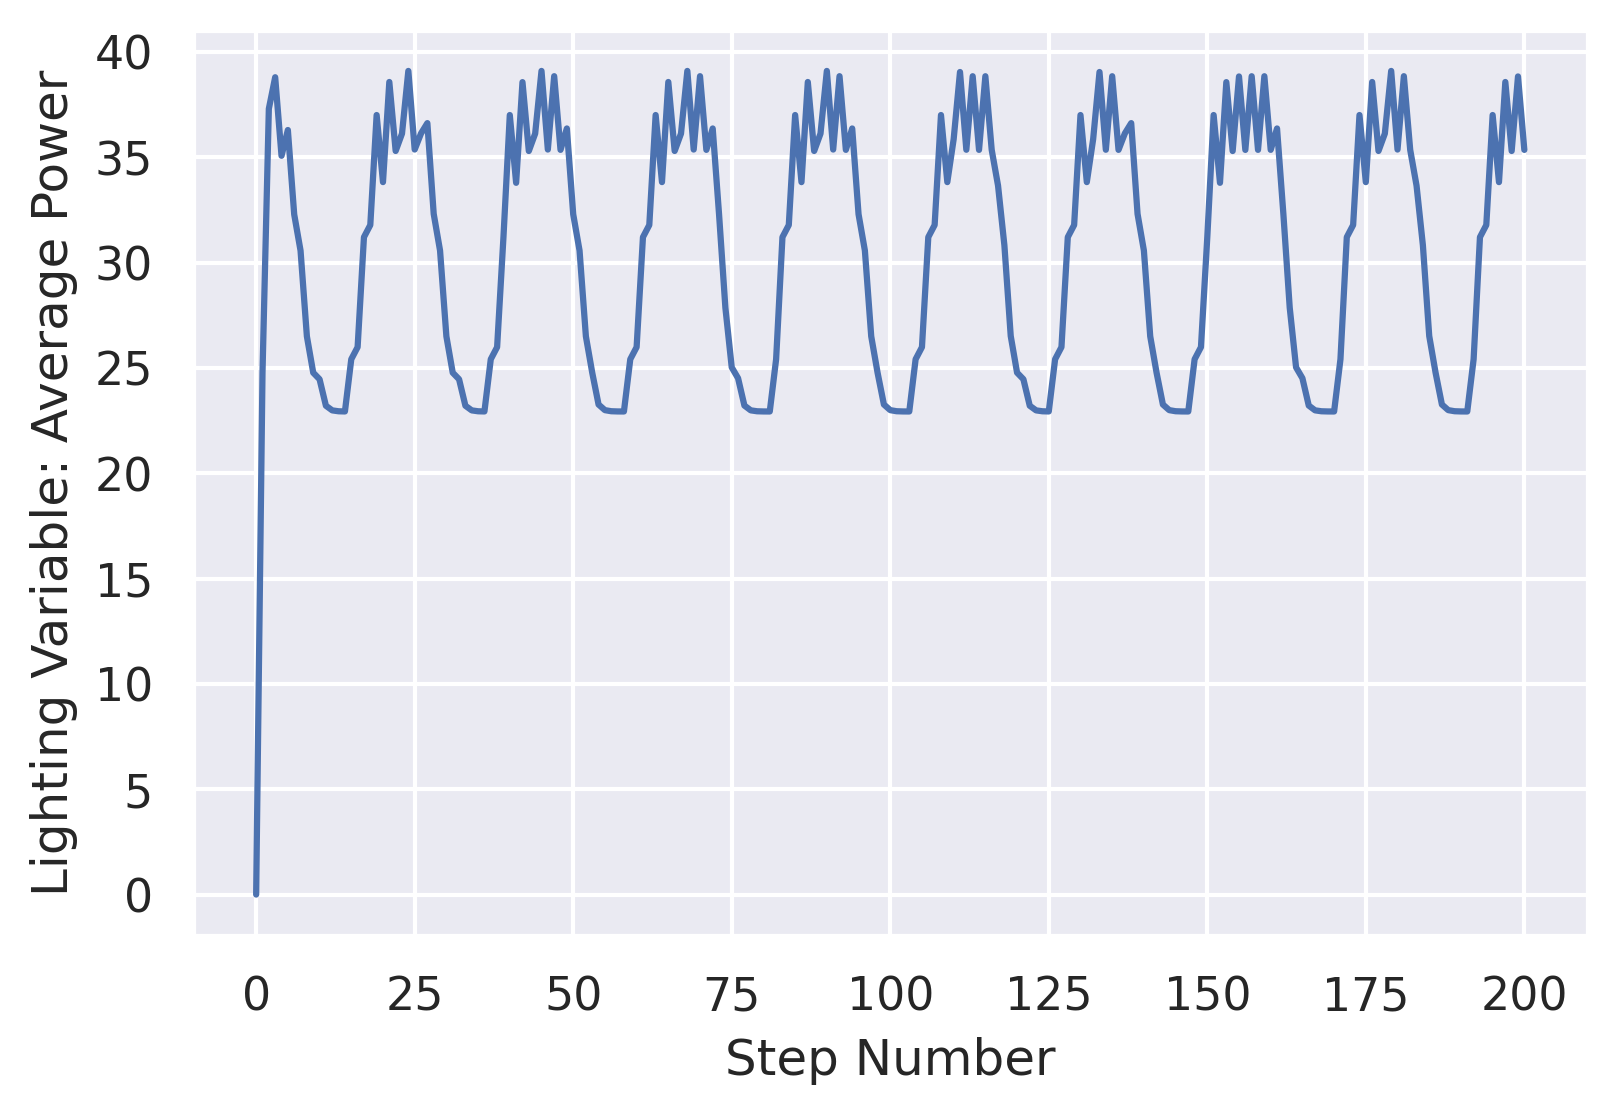

In [17]:
plt.plot(constant_model_out.Average_Power)
plt.xlabel('Step Number')
plt.ylabel('Lighting Constant: Average Power')
plt.show()

plt.plot(variable_model_out.Average_Power)
plt.xlabel('Step Number')
plt.ylabel('Lighting Variable: Average Power')
plt.show()

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


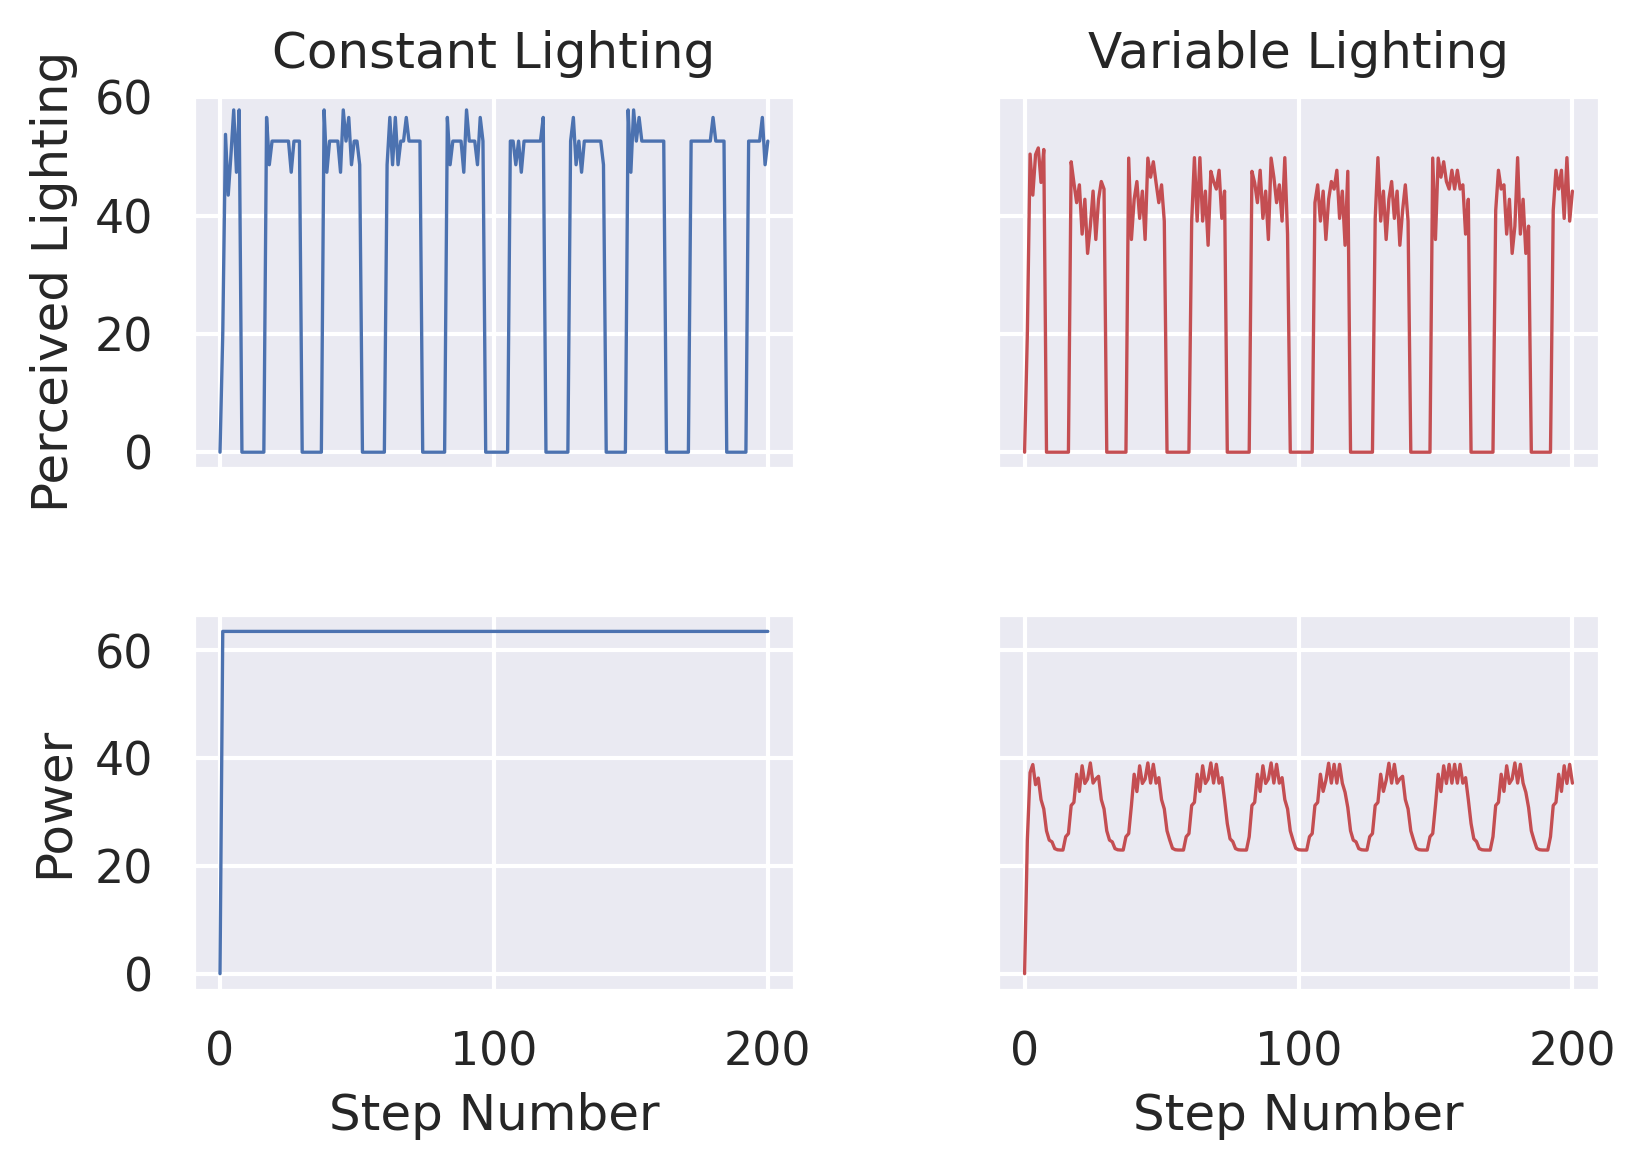

In [28]:
#colors = [(0, 0.25, 0.75), (0.9, 0.1, 0.1)] # Experiment with this
#cm_rand = LinearSegmentedColormap.from_list('test', colors, N=6, gamma=0.8)

print(pallet.as_hex())

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='all', sharey='row')
fig.tight_layout(pad=2)

thin = 0.8
ax1.set_title('Constant Lighting')
ax1.plot(constant_model_out.Average_Perceived_Lighting, c='#4c72b0', linewidth=thin)
ax1.set(xlabel='Step Number', ylabel='Perceived Lighting')
ax1.label_outer()
ax1.grid(True)

ax3.plot(constant_model_out.Average_Power, c='#4c72b0', linewidth=thin)
ax3.set(xlabel='Step Number', ylabel='Power')
ax3.label_outer()
ax3.grid(True)

# chart=
ax2.set_title('Variable Lighting')
ax2.plot(variable_model_out.Average_Perceived_Lighting, c='#c44e52', linewidth=thin)
ax2.set(xlabel='Step Number', ylabel='Perceived Lighting')
ax2.label_outer()
ax2.grid(True)

ax4.plot(variable_model_out.Average_Power, c='#c44e52', linewidth=thin)
ax4.set(xlabel='Step Number', ylabel='Power')
ax4.label_outer()
ax4.grid(True)

time_str = time.strftime("%y%m%d_%H%M")
fig.savefig("img/lighting_small_combi_" + time_str + ".png")
plt.show()

In [19]:
print('Results for constant lighting:')
constant_averaged_perceived_lighting = np.average(constant_model_out.Average_Perceived_Lighting[int(test_width/3):])
print('Averaged Perceived Lighting: %.3f' % constant_averaged_perceived_lighting)

constant_averaged_power = np.sum(constant_model_out.Average_Power[int(test_width/3):])
print('Averaged Power Usage: %.3f watt seconds per street light' % constant_averaged_power)

print()
print('Results for variable lighting:')

variable_averaged_perceived_lighting = np.average(variable_model_out.Average_Perceived_Lighting[int(test_width/3):])
print('Averaged Perceived Lighting: %.3f' % variable_averaged_perceived_lighting)

variable_averaged_power = np.sum(variable_model_out.Average_Power[int(test_width/3):])
print('Averaged Power Usage: %.3f watt seconds per street light' % variable_averaged_power)

Results for constant lighting:
Averaged Perceived Lighting: 31.904
Averaged Power Usage: 10672.032 watt seconds per street light

Results for variable lighting:
Averaged Perceived Lighting: 26.173
Averaged Power Usage: 5173.944 watt seconds per street light
